In [1]:
import json 
import pyspark as ps
# import the many data types
from pyspark.sql.types import *
import datetime 
import pandas as pd

spark = (ps.sql.SparkSession.builder 
        .master("local[4]") 
        .appName("sparkcase") 
        .getOrCreate()
        )

sc = spark.sparkContext 

with open('data/french_tweets.json', 'r') as json_file:
    json_list = list(json_file)  


In [2]:
df = spark.read.json('data/french_tweets.json')

In [3]:
def parse_json(json_string):
    dct = json.loads(json_string)
    return dct

In [4]:

        
list = ["text", "coordinates", "created_at", "retweet_count"]

# for line in json_list[:2]:
#         print(parse_json(line))



In [5]:
# create a schema of your own
schema = StructType( [
    StructField('text',StringType(),True),
    StructField('created_at',StringType(),True),
    StructField('user',StringType(),True),
    StructField('retweet_count',StringType(),True),
    StructField('favorite_count',StringType(),True) 
] )



In [6]:
french_tweets = spark.read.json('data/french_tweets.json', schema = schema )

In [7]:
french_tweets.printSchema()

root
 |-- text: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- user: string (nullable = true)
 |-- retweet_count: string (nullable = true)
 |-- favorite_count: string (nullable = true)



In [8]:
pandas_df = french_tweets.select("*").toPandas()

In [9]:
pandas_df.head()

,text,created_at,user,retweet_count,favorite_count
0,Je comprends pas trop la fin de 13 reasons why 😓,Wed Apr 26 13:30:45 +0000 2017,"{""id"":3137428743,""id_str"":""3137428743"",""name"":...",0,0
1,@julesbl99 travailles au lieu de raconter ta vie,Wed Apr 26 13:30:45 +0000 2017,"{""id"":2586505687,""id_str"":""2586505687"",""name"":...",0,0
2,@lecho_fr @lasaucelleoff J'espère faire mieux ...,Wed Apr 26 13:30:46 +0000 2017,"{""id"":805805743316357120,""id_str"":""80580574331...",0,0
3,"362 jours par an je suis adorable, aujourd'hui...",Wed Apr 26 13:30:46 +0000 2017,"{""id"":335930062,""id_str"":""335930062"",""name"":""B...",0,0
4,@julia71903850 Отличная реклама!,Wed Apr 26 13:30:47 +0000 2017,"{""id"":1254136784,""id_str"":""1254136784"",""name"":...",0,0


In [10]:
print(pandas_df['text'])

0          Je comprends pas trop la fin de 13 reasons why 😓
1          @julesbl99 travailles au lieu de raconter ta vie
2         @lecho_fr @lasaucelleoff J'espère faire mieux ...
3         362 jours par an je suis adorable, aujourd'hui...
4                          @julia71903850 Отличная реклама!
                                ...                        
214931          @TheRealGuigz Mdrr pire sensation de la vie
214932    AUBRY  DELANOE MADELIN HUE SARKHOSI  BAYROU FI...
214933                  Go Japan!!! https://t.co/lW3q1VFTS8
214934    happy birthday @tsugimag 🎂 #10ans @laurentgarn...
214935     @queen_ser @RealSneakers_ elles sont dur à avoir
Name: text, Length: 214936, dtype: object


In [11]:
pandas_df['lowercase'] = pandas_df['text'].str.lower()

pandas_df['lepen'] = pandas_df['lowercase'].str.contains("marine" or 'le pen' or "lmarine" or "marion_m_le_pen")==1
pandas_df['macron'] = pandas_df['lowercase'].str.contains("macron" or "emmanuel")==1
pandas_df['candidate'] = pandas_df['lepen']|pandas_df['macron']
pandas_df['other'] = ~pandas_df['lepen'] & ~pandas_df['macron']

In [16]:
grouped_tweet = pandas_df.groupby('retweet_count')

In [19]:
for i in grouped_tweet:
    print(1)


1


In [20]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214936 entries, 0 to 214935
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   text            214926 non-null  object
 1   created_at      214926 non-null  object
 2   user            214926 non-null  object
 3   retweet_count   214926 non-null  object
 4   favorite_count  214926 non-null  object
 5   lowercase       214926 non-null  object
 6   lepen           214936 non-null  bool  
 7   macron          214936 non-null  bool  
 8   candidate       214936 non-null  bool  
 9   other           214936 non-null  bool  
dtypes: bool(4), object(6)
memory usage: 10.7+ MB


In [21]:

pandas_df['macron'].sum()


7689

In [22]:
pandas_df[pandas_df['candidate']==True]

,text,created_at,user,retweet_count,favorite_count,lowercase,lepen,macron,candidate,other
5,La macronie En Marche ! commence déjà à s'écha...,Wed Apr 26 13:30:47 +0000 2017,"{""id"":273524713,""id_str"":""273524713"",""name"":""V...",0,0,la macronie en marche ! commence déjà à s'écha...,False,True,True,False
20,Choisir entre le coup de com.de marine ou le c...,Wed Apr 26 13:30:57 +0000 2017,"{""id"":839403756768866304,""id_str"":""83940375676...",0,0,choisir entre le coup de com.de marine ou le c...,True,True,True,False
30,Parce que la situation est grave... pas une vo...,Wed Apr 26 13:31:04 +0000 2017,"{""id"":16883353,""id_str"":""16883353"",""name"":""cor...",0,0,parce que la situation est grave... pas une vo...,False,True,True,False
34,"@EmmanuelMacron Du blabla, je n'ai vraient pas...",Wed Apr 26 13:31:07 +0000 2017,"{""id"":825009662307233794,""id_str"":""82500966230...",0,0,"@emmanuelmacron du blabla, je n'ai vraient pas...",False,True,True,False
35,"A #Whirlpool #Amiens, Katia Dubois, déléguée d...",Wed Apr 26 13:31:07 +0000 2017,"{""id"":20053721,""id_str"":""20053721"",""name"":""Mat...",0,0,"a #whirlpool #amiens, katia dubois, déléguée d...",True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
214853,@LaCroix ON A BIEN REÇU L'AVERTISSEMENT DE S'E...,Sat Apr 29 04:58:37 +0000 2017,"{""id"":462816536,""id_str"":""462816536"",""name"":""M...",0,0,@lacroix on a bien reçu l'avertissement de s'e...,False,True,True,False
214870,Quelle pagaille! @francoisbaroin est attaqué p...,Sat Apr 29 04:59:39 +0000 2017,"{""id"":2535314523,""id_str"":""2535314523"",""name"":...",0,0,quelle pagaille! @francoisbaroin est attaqué p...,False,True,True,False
214906,@PatrieActus @Disciplus1 @cahierdoleances ON A...,Sat Apr 29 05:00:24 +0000 2017,"{""id"":462816536,""id_str"":""462816536"",""name"":""M...",0,0,@patrieactus @disciplus1 @cahierdoleances on a...,False,True,True,False
214917,@lEspoirMarine IL VAUT MIEUX 1 ALLIANCE DE CON...,Sat Apr 29 05:00:41 +0000 2017,"{""id"":922710182,""id_str"":""922710182"",""name"":""p...",0,0,@lespoirmarine il vaut mieux 1 alliance de con...,True,False,True,False


In [23]:
def convert_date(date_str):
    if date_str is not None:
        date_time_str = date_str
        date_time_obj = datetime.datetime.strptime(date_time_str, '%a %b %d %H:%M:%S %z %Y')
        return date_time_obj
    else:
        return None

In [24]:
date = pandas_df['created_at'].apply(lambda x: convert_date(x))
pandas_df['date'] = date

In [25]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214936 entries, 0 to 214935
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   text            214926 non-null  object             
 1   created_at      214926 non-null  object             
 2   user            214926 non-null  object             
 3   retweet_count   214926 non-null  object             
 4   favorite_count  214926 non-null  object             
 5   lowercase       214926 non-null  object             
 6   lepen           214936 non-null  bool               
 7   macron          214936 non-null  bool               
 8   candidate       214936 non-null  bool               
 9   other           214936 non-null  bool               
 10  date            214926 non-null  datetime64[ns, UTC]
dtypes: bool(4), datetime64[ns, UTC](1), object(6)
memory usage: 12.3+ MB


In [26]:
pandas_df['date2'] = pd.to_datetime(pandas_df['date']) 

In [27]:
pandas_df['hour'] = pandas_df['date2'].dt.hour

In [28]:
pandas_df['day'] = pandas_df['date2'].dt.day

In [29]:
pandas_df['day'].max()

29.0

In [30]:
pandas_df['day'].min()

26.0

In [31]:
pandas_df

,text,created_at,user,retweet_count,favorite_count,lowercase,lepen,macron,candidate,other,date,date2,hour,day
0,Je comprends pas trop la fin de 13 reasons why 😓,Wed Apr 26 13:30:45 +0000 2017,"{""id"":3137428743,""id_str"":""3137428743"",""name"":...",0,0,je comprends pas trop la fin de 13 reasons why 😓,False,False,False,True,2017-04-26 13:30:45+00:00,2017-04-26 13:30:45+00:00,13.0,26.0
1,@julesbl99 travailles au lieu de raconter ta vie,Wed Apr 26 13:30:45 +0000 2017,"{""id"":2586505687,""id_str"":""2586505687"",""name"":...",0,0,@julesbl99 travailles au lieu de raconter ta vie,False,False,False,True,2017-04-26 13:30:45+00:00,2017-04-26 13:30:45+00:00,13.0,26.0
2,@lecho_fr @lasaucelleoff J'espère faire mieux ...,Wed Apr 26 13:30:46 +0000 2017,"{""id"":805805743316357120,""id_str"":""80580574331...",0,0,@lecho_fr @lasaucelleoff j'espère faire mieux ...,False,False,False,True,2017-04-26 13:30:46+00:00,2017-04-26 13:30:46+00:00,13.0,26.0
3,"362 jours par an je suis adorable, aujourd'hui...",Wed Apr 26 13:30:46 +0000 2017,"{""id"":335930062,""id_str"":""335930062"",""name"":""B...",0,0,"362 jours par an je suis adorable, aujourd'hui...",False,False,False,True,2017-04-26 13:30:46+00:00,2017-04-26 13:30:46+00:00,13.0,26.0
4,@julia71903850 Отличная реклама!,Wed Apr 26 13:30:47 +0000 2017,"{""id"":1254136784,""id_str"":""1254136784"",""name"":...",0,0,@julia71903850 отличная реклама!,False,False,False,True,2017-04-26 13:30:47+00:00,2017-04-26 13:30:47+00:00,13.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214931,@TheRealGuigz Mdrr pire sensation de la vie,Sat Apr 29 05:01:53 +0000 2017,"{""id"":629267109,""id_str"":""629267109"",""name"":""A...",0,0,@therealguigz mdrr pire sensation de la vie,False,False,False,True,2017-04-29 05:01:53+00:00,2017-04-29 05:01:53+00:00,5.0,29.0
214932,AUBRY DELANOE MADELIN HUE SARKHOSI BAYROU FI...,Sat Apr 29 05:01:53 +0000 2017,"{""id"":1961096906,""id_str"":""1961096906"",""name"":...",0,0,aubry delanoe madelin hue sarkhosi bayrou fi...,False,False,False,True,2017-04-29 05:01:53+00:00,2017-04-29 05:01:53+00:00,5.0,29.0
214933,Go Japan!!! https://t.co/lW3q1VFTS8,Sat Apr 29 05:01:54 +0000 2017,"{""id"":608439966,""id_str"":""608439966"",""name"":""J...",0,0,go japan!!! https://t.co/lw3q1vfts8,False,False,False,True,2017-04-29 05:01:54+00:00,2017-04-29 05:01:54+00:00,5.0,29.0
214934,happy birthday @tsugimag 🎂 #10ans @laurentgarn...,Sat Apr 29 05:01:54 +0000 2017,"{""id"":5554132,""id_str"":""5554132"",""name"":""erwan...",0,0,happy birthday @tsugimag 🎂 #10ans @laurentgarn...,False,False,False,True,2017-04-29 05:01:54+00:00,2017-04-29 05:01:54+00:00,5.0,29.0


In [32]:
tweet_per_hour = pandas_df.groupby(['day','hour']).sum(['macron', 'lepen', 'candidate', 'other'])

In [33]:
tweet_per_hour.reset_index()

,day,hour,lepen,macron,candidate,other
0,26.0,13.0,15,46,55,623
1,26.0,14.0,27,142,165,2069
2,26.0,15.0,67,221,273,5080
3,26.0,16.0,12,60,69,1317
4,26.0,17.0,39,187,214,4927
...,...,...,...,...,...,...
60,29.0,1.0,2,4,6,416
61,29.0,2.0,5,21,26,424
62,29.0,3.0,2,23,25,403
63,29.0,4.0,9,26,32,699


In [ ]:
t

In [34]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [64]:
x_label = []
for d in range(26,30):
    for h in range(0,24):
        str1 = 'Apr ' + str(d)
        str1 += ' : ' + str(h)
        x_label.append(str1)
x_label = x_label[14:-17]

In [65]:
y_l = tweet_per_hour['lepen']
y_m = tweet_per_hour['macron']
y_all = tweet_per_hour['candidate']
y_other = tweet_per_hour['other']

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

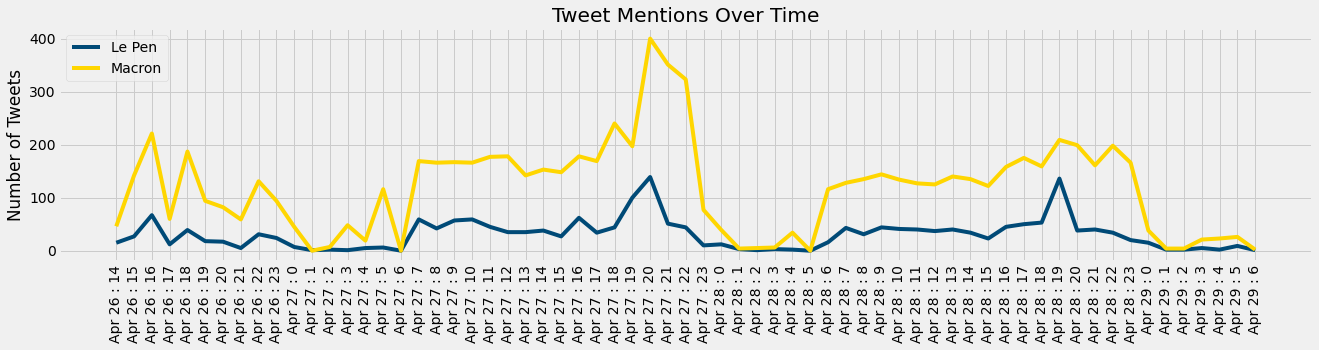

In [85]:
fig, ax = plt.subplots(figsize=(20,4))

ax.plot(x_label, y_l, label = 'Le Pen', color = '#004A77')
ax.plot(x_label, y_m, label = 'Macron', color = '#FFD600')
ax.set_ylabel("Number of Tweets")
ax.legend(loc=2)
ax.set_title('Tweet Mentions Over Time')
plt.xticks(rotation = 'vertical')

In [86]:
fig.savefig('time.png', bbox_inches = "tight")

In [ ]:
grouped['macron'].mean()

In [ ]:
#FFD600 < macron

#004A77 <lepen

In [47]:
x = []

for i in range(26,30):
    for h in range(0,24):
        string =  'Apr ' + str(i) + ' :' + str(h)
        x.append(string)
        


In [48]:
x

['Apr 26 :0',
 'Apr 26 :1',
 'Apr 26 :2',
 'Apr 26 :3',
 'Apr 26 :4',
 'Apr 26 :5',
 'Apr 26 :6',
 'Apr 26 :7',
 'Apr 26 :8',
 'Apr 26 :9',
 'Apr 26 :10',
 'Apr 26 :11',
 'Apr 26 :12',
 'Apr 26 :13',
 'Apr 26 :14',
 'Apr 26 :15',
 'Apr 26 :16',
 'Apr 26 :17',
 'Apr 26 :18',
 'Apr 26 :19',
 'Apr 26 :20',
 'Apr 26 :21',
 'Apr 26 :22',
 'Apr 26 :23',
 'Apr 27 :0',
 'Apr 27 :1',
 'Apr 27 :2',
 'Apr 27 :3',
 'Apr 27 :4',
 'Apr 27 :5',
 'Apr 27 :6',
 'Apr 27 :7',
 'Apr 27 :8',
 'Apr 27 :9',
 'Apr 27 :10',
 'Apr 27 :11',
 'Apr 27 :12',
 'Apr 27 :13',
 'Apr 27 :14',
 'Apr 27 :15',
 'Apr 27 :16',
 'Apr 27 :17',
 'Apr 27 :18',
 'Apr 27 :19',
 'Apr 27 :20',
 'Apr 27 :21',
 'Apr 27 :22',
 'Apr 27 :23',
 'Apr 28 :0',
 'Apr 28 :1',
 'Apr 28 :2',
 'Apr 28 :3',
 'Apr 28 :4',
 'Apr 28 :5',
 'Apr 28 :6',
 'Apr 28 :7',
 'Apr 28 :8',
 'Apr 28 :9',
 'Apr 28 :10',
 'Apr 28 :11',
 'Apr 28 :12',
 'Apr 28 :13',
 'Apr 28 :14',
 'Apr 28 :15',
 'Apr 28 :16',
 'Apr 28 :17',
 'Apr 28 :18',
 'Apr 28 :19',
 'Apr 28 :

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

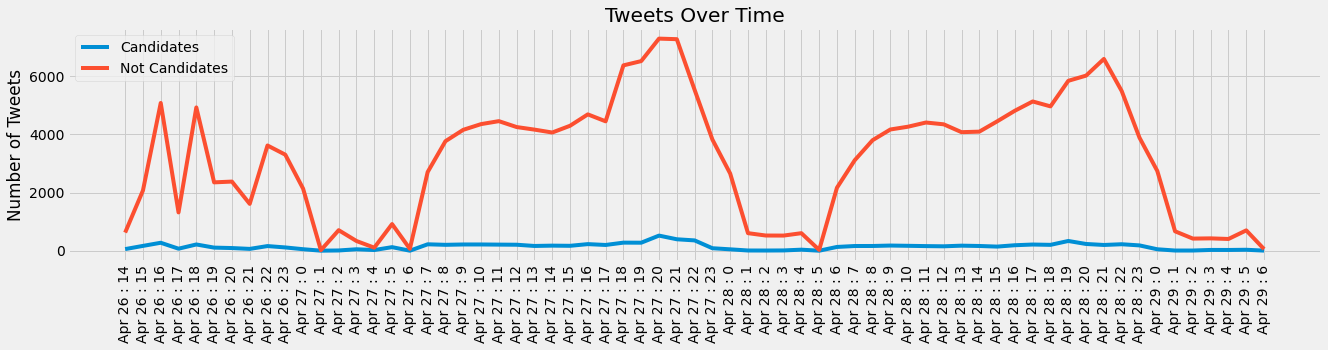

In [92]:
fig, ax = plt.subplots(figsize=(20,4))

ax.plot(x_label, y_all, label = 'Candidates')
ax.plot(x_label, y_other, label = 'Not Candidates')
ax.set_ylabel("Number of Tweets")
ax.legend(loc=2)
ax.set_title('Tweets Over Time')
plt.xticks(rotation = 'vertical')

In [91]:
fig.savefig('candidate.png', bbox_inches = "tight")